# Exploratory Data Analysis

In [1]:
import warnings
import os
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('weather_content/weather_dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("weather_content/weather_dataset"))
file_count = len(files)
# print(file_count)

['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise', 'test.csv']


In [3]:
# Make new base directory
original_dataset_dir = 'weather_content/weather_dataset'
base_dir = 'weather_content/test-train-data'
os.mkdir(base_dir)

In [4]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

#Under validation folder create five folders 
# (cloud, folly, rainy, shine, sunrise)

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

In [5]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [6]:
CLOUDY_SOURCE_DIR = 'weather_content/weather_dataset/cloudy/'
TRAINING_CLOUDY_DIR = 'weather_content/test-train-data/train/cloudy/'
VALID_CLOUDY_DIR = 'weather_content/test-train-data/validation/cloudy/'

FOGGY_SOURCE_DIR = 'weather_content/weather_dataset/foggy/'
TRAINING_FOGGY_DIR = 'weather_content/test-train-data/train/foggy/'
VALID_FOGGY_DIR = 'weather_content/test-train-data/validation/foggy/'

RAINY_SOURCE_DIR = 'weather_content/weather_dataset/rainy/'
TRAINING_RAINY_DIR = 'weather_content/test-train-data/train/rainy/'
VALID_RAINY_DIR = 'weather_content/test-train-data/validation/rainy/'

SHINE_SOURCE_DIR = 'weather_content/weather_dataset/shine/'
TRAINING_SHINE_DIR = 'weather_content/test-train-data/train/shine/'
VALID_SHINE_DIR = 'weather_content/test-train-data/validation/shine/'

SUNRISE_SOURCE_DIR = 'weather_content/weather_dataset/sunrise/'
TRAINING_SUNRISE_DIR = 'weather_content/test-train-data/train/sunrise/'
VALID_SUNRISE_DIR = 'weather_content/test-train-data/validation/sunrise/'

In [7]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)


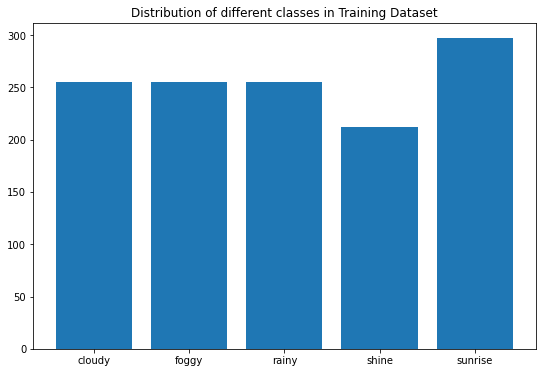

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
%matplotlib inline
import pathlib

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('weather_content/test-train-data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [9]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('weather_content/test-train-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


# Deep Learning with Data Augumentation


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
img_width=256; img_height=256
batch_size=16

In [12]:

TRAINING_DIR = 'weather_content/test-train-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [13]:
VALIDATION_DIR = 'weather_content/test-train-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [14]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [15]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0

In [16]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])


In [17]:
history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
80/80 [==============================] - 73s 915ms/step - loss: 1.4543 - accuracy: 0.3328 - val_loss: 1.3120 - val_accuracy: 0.3938
Epoch 2/30
80/80 [==============================] - 70s 881ms/step - loss: 1.1853 - accuracy: 0.4725 - val_loss: 1.1650 - val_accuracy: 0.4779
Epoch 3/30
80/80 [==============================] - 73s 914ms/step - loss: 1.0295 - accuracy: 0.5330 - val_loss: 0.9372 - val_accuracy: 0.5442
Epoch 4/30
80/80 [==============================] - 71s 891ms/step - loss: 0.9823 - accuracy: 0.5502 - val_loss: 0.9580 - val_accuracy: 0.5398
Epoch 5/30
80/80 [==============================] - 77s 960ms/step - loss: 0.9537 - accuracy: 0.5777 - val_loss: 0.8689 - val_accuracy: 0.6770
Epoch 6/30
80/80 [==============================] - 74s 926ms/step - loss: 1.0064 - accuracy: 0.5879 - val_loss: 0.9299 - val_accuracy: 0.5664
Epoch 7/30
80/80 [==============================] - 73s 913ms/step - loss: 0.9308 - accuracy: 0.5911 - val_loss: 0.9116 - val_accuracy: 0.5442

Epoch 28/30
80/80 [==============================] - 75s 935ms/step - loss: 0.7325 - accuracy: 0.6970 - val_loss: 0.6883 - val_accuracy: 0.6947
Epoch 29/30
80/80 [==============================] - 77s 957ms/step - loss: 0.7265 - accuracy: 0.6845 - val_loss: 0.7300 - val_accuracy: 0.6726
Epoch 30/30
80/80 [==============================] - 75s 936ms/step - loss: 0.6859 - accuracy: 0.6954 - val_loss: 0.7071 - val_accuracy: 0.7389


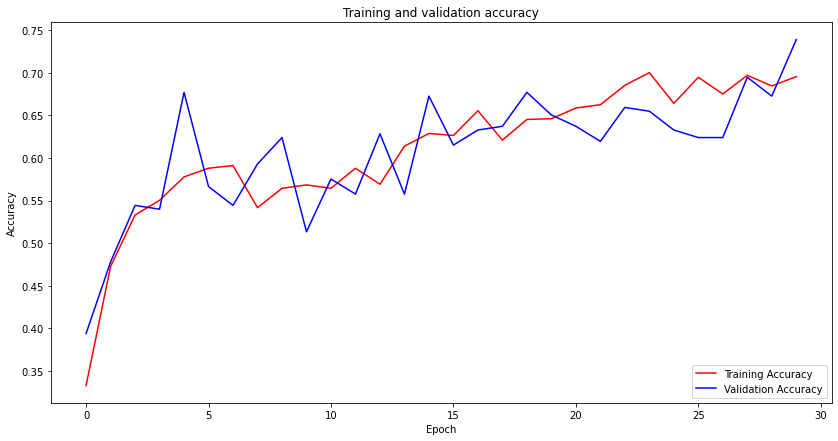

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

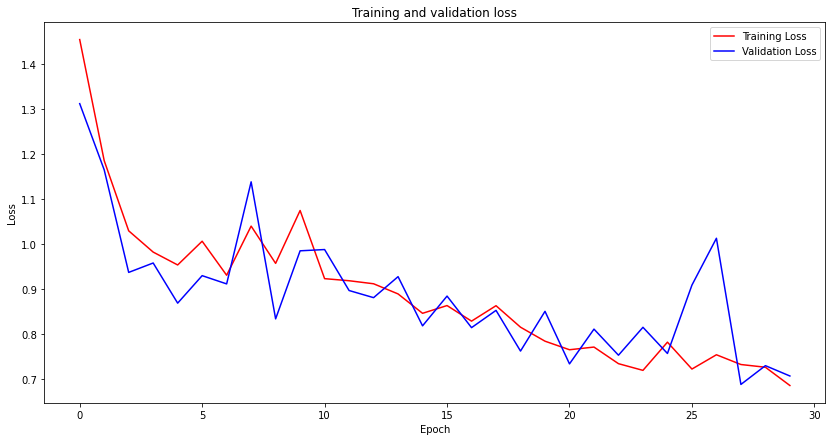

In [19]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [20]:
## Test Performance on Test Data

import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [21]:
# Read Test Images Dir and their labels
test_images_dir = 'weather_content/weather_dataset/alien_test/'
test_df = pd.read_csv('weather_content/weather_dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('weather_content/test_preproc_CNN.npy', test_preprocessed_images)

In [49]:
print(test_ids)

['Cloud_1.png', 'Cloud_2.jpg', 'Cloud_3.jpeg', 'Cloud_4.jpg', 'foggy_1.jpg', 'foggy_2.jpg', 'foggy_3.jpg', 'foggy_4.jpg', 'foggy_5.jpg', 'foggy_6.jpg', 'foggy_7.jpg', 'foggy_8.jpg', 'foggy_9.jpg', 'foggy_10.jpg', 'rain_1.jpg', 'rain_2.png', 'rain_3.jpg', 'rain_4.jpg', 'rain_5.jpg', 'rain_6.jpg', 'shine_1.jpg', 'shine_2.jpg', 'shine_3.jpg', 'sunrise_1.jpg', 'sunrise_2.jpg', 'sunrise_3.jpg', 'sunrise_4.jpg', 'sunrise_5.jpg', 'sunrise_6.jpg', 'sunrise_7.jpg']


In [31]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 1s 17ms/step
[1 0 3 3 1 0 2 0 0 0 4 3 2 0 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [33]:
test_df = pd.read_csv('weather_content/weather_dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [37]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [38]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat


array([[1, 1, 0, 2, 0],
       [5, 1, 2, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]], dtype=int64)

In [39]:
train_dir = 'weather_content/test-train-data/train/'
classes = os.listdir(train_dir)

In [40]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

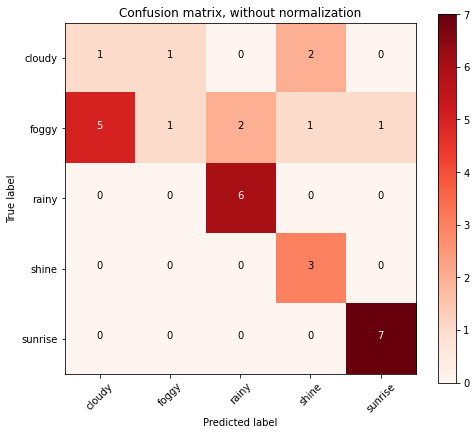

In [41]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()